# Numerical Integration

In [3]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

### Rectangular rule:

In [4]:
def rectangular_rule(f, a, b, N=100):
    """
    Calculates definite integral of 1D function using rectangular rule.
    Args:
        f (function): A function defined on interval [a, b]
        a (float): Left-hand side point of the interval
        b (float): Right-hand side point of the interval
        N (int): Number of subdivisions of the interval [a, b]
    Returns:
        float: Definite integral
    """
    x = np.linspace(a, b, N)
    I = 0
    for i in range(N-1):
        I += (x[i+1] - x[i]) * f((x[i] + x[i+1]) / 2.0)
    return I

In [5]:
def f(x):
    return np.sin(x)

I = rectangular_rule(f, 0.0, 1.0 * np.pi, 10)
print(I)

2.01019011595


### Trapezoidal rule:

In [6]:
def trapezoidal_rule(f, a, b, N=100):
    """
    Calculates definite integral of 1D function using trapezoidal rule.
    Args:
        f (function): A function defined on interval [a, b]
        a (float): Left-hand side point of the interval
        b (float): Right-hand side point of the interval
        N (int): Number of subdivisions of the interval [a, b]
    Returns:
        float: Definite integral
    """
    x = np.linspace(a, b, N)
    I = 0
    for i in range(N-1):
        I += (x[i+1] - x[i]) * (f(x[i]) + f(x[i+1])) / 2.0
    return I

In [7]:
def f(x):
    return np.sin(x)

I = trapezoidal_rule(f, 0.0, 1.0 * np.pi, 10)
print(I)

1.97965081122


### Simpson's rule:

In [8]:
def simpsons_quadratic_rule(f, a, b, N=100):
    """
    Calculates definite integral of 1D function using Simpson's 1/3 rule.
    Args:
        f (function): A function defined on interval [a, b]
        a (float): Left-hand side point of the interval
        b (float): Right-hand side point of the interval
        N (int): Number of subdivisions of the interval [a, b]
    Returns:
        float: Definite integral
    """
    x = np.linspace(a, b, N)
    I = 0
    for i in range(N-2):
        I += (x[i+1] - x[i]) * (1.0 / 6.0 * f(x[i]) + 2.0 / 3.0 * f((x[i] + x[i+1]) / 2.0) + 1.0 / 6.0 * f(x[i+1]))
    return I

In [9]:
def f(x):
    return np.sin(x)

I = simpsons_quadratic_rule(f, 0.0, 1.0 * np.pi, 10)
print(I)

1.93970265647


In [10]:
def simpsons_cubic_rule(f, a, b, N=100):
    """
    Calculates definite integral of 1D function using Simpson's 3/8 rule.
    Args:
        f (function): A function defined on interval [a, b]
        a (float): Left-hand side point of the interval
        b (float): Right-hand side point of the interval
        N (int): Number of subdivisions of the interval [a, b]
    Returns:
        float: Definite integral
    """
    x = np.linspace(a, b, N)
    I = 0
    for i in range(N-1):
        I += (x[i+1] - x[i]) * (1.0 / 8.0 * f(x[i]) + 3.0 / 8.0 * f((2.0 * x[i] + x[i+1]) / 3.0) \
            + 3.0 / 8.0 * f((x[i] + 2.0 * x[i+1]) / 3.0) + 1.0 / 8.0 * f(x[i+1]))
    return I

In [11]:
def f(x):
    return np.sin(x)

I = simpsons_cubic_rule(f, 0.0, 1.0 * np.pi, 10)
print(I)

2.00000459713


### Romberg's method:

In [12]:
def rombergs_method(f, a, b, m=10):
    """
    Calculates definite integral of 1D function using Romberg's method.
    Args:
        f (function): A function defined on interval [a, b]
        a (float): Left-hand side point of the interval
        b (float): Right-hand side point of the interval
        m (int): Number of extrapolations
    Returns:
        float: Definite integral
    """
    R = np.zeros((m, m))
    R[0, 0] = trapezoidal_rule(f, a, b, 2)
    for k in range(1, m):
        R[k, 0] = trapezoidal_rule(f, a, b, 2**k + 1) 
        for j in range(1, k + 1):
            R[k, j] = R[k, j-1] + 1.0 / (4**j - 1) * (R[k, j-1] - R[k-1, j-1]) 
    return R[m-1, m-1]

In [13]:
def f(x):
    return np.sin(x)

I = rombergs_method(f, 0.0, 1.0 * np.pi, 10)
print(I)

2.0


### Gaussian quadrature:

In [31]:
def gaussian_quadrature(f, a, b, N=3):
    """
    Calculates definite integral of 1D function using Gaussian quadrature rule.
    Args:
        f (function): A function defined on interval [a, b]
        a (float): Left-hand side point of the interval
        b (float): Right-hand side point of the interval
        N (int): Degree of used polynomial
    Returns:
        float: Definite integral
    """
    x, w = np.polynomial.legendre.leggauss(N)
    #x, w = np.polynomial.hermite.hermgauss(N)
    #x, w = np.polynomial.chebyshev.chebgauss(N)
    I = 0
    for i in range(N):
        I += w[i] * f((b - a) / 2.0 * x[i] + (a + b) / 2.0)
    return (b - a) / 2.0 * I

In [32]:
def f(x):
    return np.sin(x)

gaussian_quadrature(f, 0.0, 1.0 * np.pi, 3)

2.0013889136077436

### Monte Carlo integration:

In [33]:
def monte_carlo_integration(f, a, b, N=500):
    """
    Calculates definite integral of 1D function using Monte Carlo method.
    Args:
        f (function): A function defined on interval [a, b]
        a (float): Left-hand side point of the interval
        b (float): Right-hand side point of the interval
        N (int): Number of random points generated
    Returns:
        float: Definite integral
    """
    
    t = np.linspace(a, b, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(t, f(t))
    
    f_min = np.min(f(t))
    f_max = np.max(f(t))
    S = 0

    for i in range(N):
        x = rnd.uniform(a, b)
        y = rnd.uniform(f_min, f_max)
        if y <= f(x) and y > 0:
            S += 1
            ax.plot(x, y, 'x', color='blue')
        elif y >= f(x) and y < 0:
            S -= 1
            ax.plot(x, y, 'x', color='red')
        else:
            ax.plot(x, y, 'x', color='gray')
            
    return (S / N) * (b - a) * (f_max - f_min)

0.0251327101603


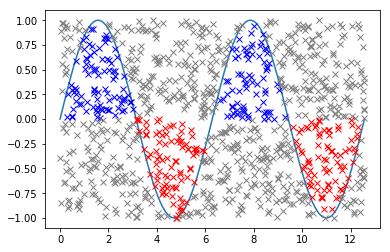

In [20]:
def f(x):
    return np.sin(x)

I = monte_carlo_integration(f, 0.0, 4.0 * np.pi, 1000)
print(I)